In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% %matplotlib inline

In [2]:
df_raw = pd.read_csv('ludovicbenistant.csv', delimiter=';')

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df_raw.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df_raw.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df_raw.rename(columns={'sales':'department'}, inplace=True)

In [7]:
df_raw['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [8]:
# encode categorical features
df = pd.get_dummies(df_raw, drop_first=True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


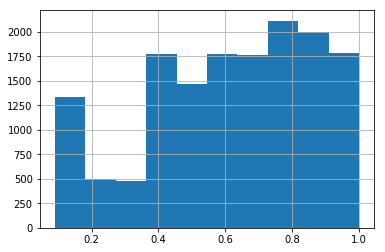

In [10]:
df['satisfaction_level'].hist()

#### Observation:
- Employee satisfaction distribution is bimodal.

In [11]:
df.iloc[:,:8].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


#### Observations:
- Left (the job) has moderate negative correlation with the satisfaction level

In [12]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Text(0.5,1,'Average Monthly Hours')

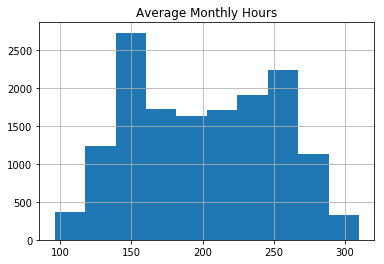

In [13]:
df['average_montly_hours'].hist()
plt.title('Average Monthly Hours')

Text(0.5,0.98,'')

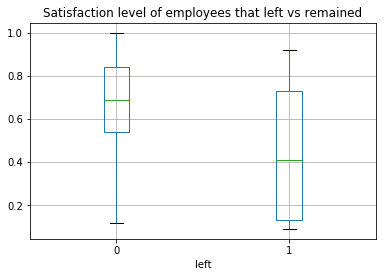

In [14]:
df.boxplot(column=['satisfaction_level'], by='left',)
plt.title('Satisfaction level of employees that left vs remained')
plt.suptitle("")

Text(0.5,0.98,'')

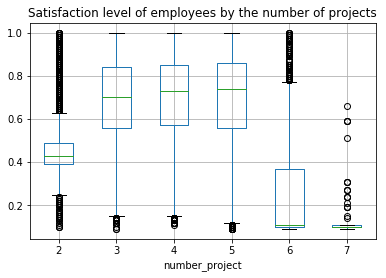

In [15]:
df.boxplot(column=['satisfaction_level'], by='number_project',)
plt.title('Satisfaction level of employees by the number of projects')
plt.suptitle("")

#### Observations:
- Employes with the highest satisfaction level tend to work on the number of projects that are within one STD around the mean 
- Both employess with low and high number of projects have low statisfaction levels. However there outliers in both instances. 

Text(0.5,0.98,'')

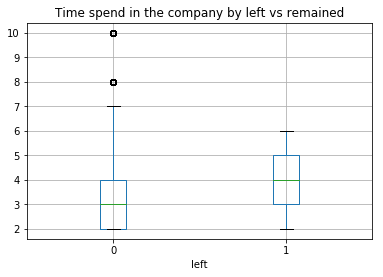

In [16]:
df.boxplot(column=['time_spend_company'], by='left',)
plt.title('Time spend in the company by left vs remained')
plt.suptitle("")

Text(0.5,0.98,'')

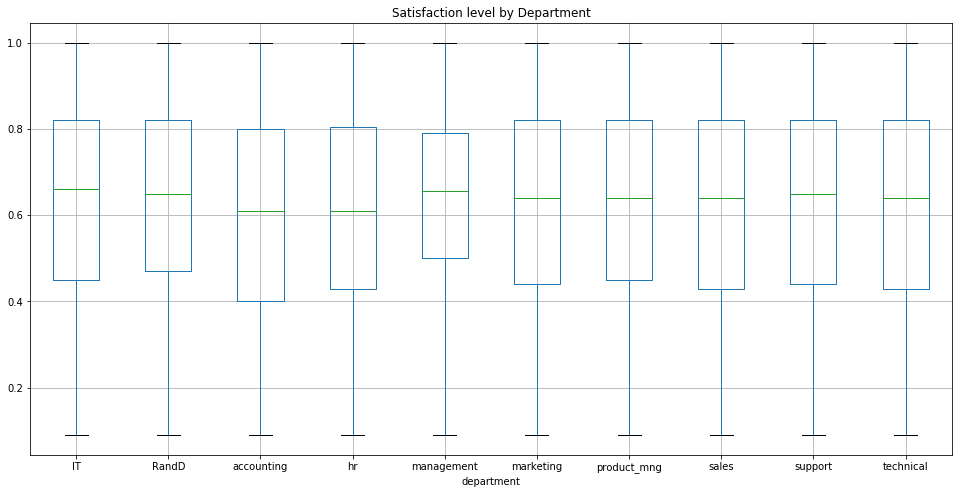

In [17]:
df_raw.boxplot(column=['satisfaction_level'], by='department', figsize=(16,8))
plt.title("Satisfaction level by Department")
plt.suptitle("")

#### Observations:
- Mean satisfaction level is approximately the same for all departements with the exception of 'Accounting' and 'HR' that have a lower avg satisfaction level compared to the rest.

In [18]:
salary = df_raw.groupby(by=['salary', 'left'])['Work_accident'].count().reset_index()
salary.rename(columns={'Work_accident':'count'}, inplace=True)
salary

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


In [19]:
salary[salary.salary=='high']['count']

0    1155
1      82
Name: count, dtype: int64

In [20]:
salary[salary.salary=='low']['count'].values

array([5144, 2172])

[Text(0,0,'Remained'), Text(0,0,'Left')]

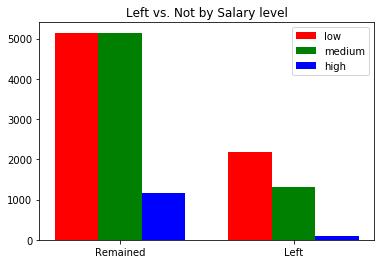

In [21]:
ind = np.arange(2)
width = 0.25

fig = plt.figure()
ax = fig.add_subplot(111)

p1 = ax.bar(ind, salary[salary.salary=='low']['count'].values, width=width, color='r')
p2 = ax.bar(ind+width, salary[salary.salary=='medium']['count'].values, width=width, color='g')
p3 = ax.bar(ind+width*2, salary[salary.salary=='high']['count'].values, width=width, color='b')

plt.title('Left vs. Not by Salary level')
ax.legend((p1[0], p2[0], p3[0]), ('low', 'medium', 'high'))
ax.set_xticks(ind+width)
ax.set_xticklabels(('Remained', 'Left'))

# Modeling

### Goal: the goal is try to predict churn (whether an employee is likely to leave the company) and identify what factprs contribute the most.

In [22]:
print('accuracy benchmark: ', round(len(df[df['left']==0])/len(df), 3))

accuracy benchmark:  0.762


#### If we guess the most popular class (employee didn't leave) we would have 76.2% accuracy

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [24]:
#train test split
X = df.drop('left', axis=1)
y = df['left'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# set cross-validation method
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# transformation
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### Logistic Regression

In [25]:
log_reg = LogisticRegression(random_state=123)
parameters = {'C': np.arange(0.001, 10, 0.5)}
log_model = GridSearchCV(log_reg, parameters, cv=kfold)
log_model.fit(X_train_std, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.000e-03, 5.010e-01, 1.001e+00, 1.501e+00, 2.001e+00, 2.501e+00,
       3.001e+00, 3.501e+00, 4.001e+00, 4.501e+00, 5.001e+00, 5.501e+00,
       6.001e+00, 6.501e+00, 7.001e+00, 7.501e+00, 8.001e+00, 8.501e+00,
       9.001e+00, 9.501e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
log_model.best_params_

{'C': 0.501}

In [27]:
log_model.best_score_

0.792482706892241

In [28]:
best_log_reg = log_model.best_estimator_

In [47]:
y_train_pred_log_reg = cross_val_predict(best_log_reg, X_train_std, y_train, cv=kfold)
precision_score(y_train, y_train_pred_log_reg)

0.6088992974238876

In [48]:
recall_score(y_train, y_train_pred_log_reg)

0.363382250174703

In [49]:
y_score=best_log_reg.predict_proba(X_train_std)[:,1]

In [50]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_score)

In [51]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

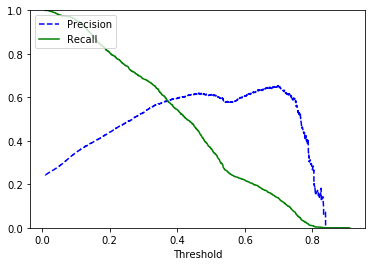

In [52]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()    

In [53]:
log_reg_features = pd.DataFrame({'features': X_train.columns, 'coefficients': best_log_reg.coef_[0]})
log_reg_features['exp_coef'] = [np.exp(coef) for coef in log_reg_features['coefficients']]
log_reg_features.sort_values('coefficients', ascending=False)

,coefficients,features,exp_coef
16,0.946286,salary_low,2.576124
17,0.668700,salary_medium,1.951698
4,0.379105,time_spend_company,1.460977
3,0.203644,average_montly_hours,1.225862
1,0.135017,last_evaluation,1.144556
15,0.105431,department_technical,1.111190
9,0.094581,department_hr,1.099198
13,0.076290,department_sales,1.079275
14,0.072637,department_support,1.075340
8,0.053648,department_accounting,1.055113


### Stochastic Gradient Descent Classifier

In [54]:
sgd_clf = SGDClassifier(max_iter=1000, random_state=123)
sgd_clf.fit(X_train_std, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=123, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [55]:
cross_val_score(sgd_clf, X_train_std, y_train, cv=kfold, scoring="accuracy")

array([0.77935054, 0.76103247, 0.78083333, 0.775     , 0.79416667,
       0.7825    , 0.78      , 0.79482902, 0.76980817, 0.78482068])

In [56]:
y_train_pred = cross_val_predict(sgd_clf, X_train_std, y_train, cv=kfold)
confusion_matrix(y_train, y_train_pred)

array([[8612,  525],
       [2112,  750]])

In [57]:
print('precision: ', precision_score(y_train, y_train_pred))
print('recall: ', recall_score(y_train, y_train_pred))

precision:  0.5882352941176471
recall:  0.2620545073375262


- The model only predicts 26.2% of 'left' instances correctly

In [58]:
y_scores = cross_val_predict(sgd_clf, X_train_std, y_train, cv=10,
                                 method="decision_function")

In [59]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

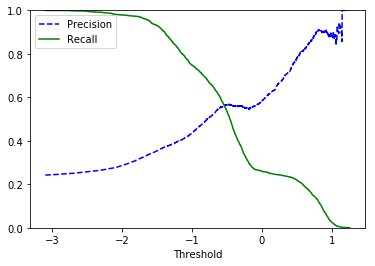

In [60]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()    

In [61]:
def  plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

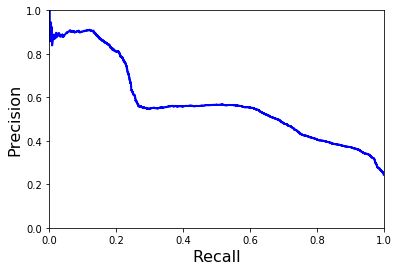

In [62]:
plot_precision_vs_recall(precisions, recalls)
plt.show()

### RandomForest

In [63]:
parameters = {'max_features':['auto','log2'], 'min_samples_split':np.arange(10, 100, 10)}
rf_clf = RandomForestClassifier(random_state=123)
rf_model = GridSearchCV(rf_clf, parameters, cv=kfold)
rf_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'log2'], 'min_samples_split': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
rf_model.best_params_

{'max_features': 'auto', 'min_samples_split': 10}

In [65]:
rf_model.best_score_

0.9799149929160763

In [66]:
best_rf = rf_model.best_estimator_
# check performace on holdout
best_rf.score(X_test, y_test)

0.9803333333333333

In [82]:
y_train_pred_rf = cross_val_predict(best_rf, X_train, y_train, cv=kfold)
y_test_pred_rf = cross_val_predict(best_rf, X_test, y_test, cv=kfold)

print("Train set")
print("Precision: ", precision_score(y_train, y_train_pred_rf))
print("Recall: ", recall_score(y_train, y_train_pred_rf))
print("\n")
print("Test set")
print("Precision: ", precision_score(y_test, y_test_pred_rf))
print("Recall: ", recall_score(y_test, y_test_pred_rf))

Train set
Precision:  0.9902731013842125
Recall:  0.9248777078965759


Test set
Precision:  0.9772036474164134
Recall:  0.9069111424541608


In [88]:
def  plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [84]:
y_probas_rf = cross_val_predict(best_rf, X_train, y_train_5, cv=kfold, method="predict_proba")
y_scores_rf = y_probas_rf[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_rf)

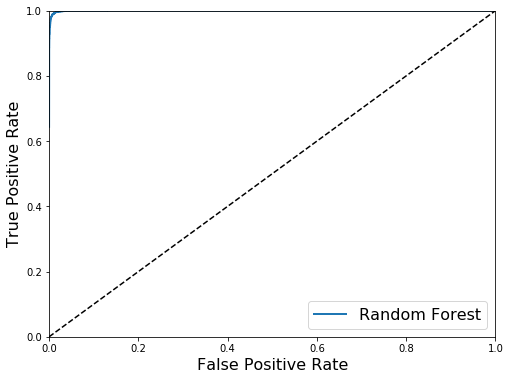

In [89]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [91]:
roc_auc_score(y_train, y_scores_rf)

0.9995597530165666

In [90]:
# Check feature importance
features = X_train.columns
feature_importances = best_rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
0,satisfaction_level,0.275033
2,number_project,0.244313
4,time_spend_company,0.155299
3,average_montly_hours,0.155234
1,last_evaluation,0.131487
5,Work_accident,0.010696
16,salary_low,0.008593
17,salary_medium,0.002769
15,department_technical,0.002648
13,department_sales,0.002605
